# Carbon Calculator Analysis

## Data Sources

We used multiple data sources for this project, such as
1. [Carbon Emmissions](https://www.ourworldindata.org/)
2. [Electricity Prices](https://www.statista.com/statistics/263492/electricity-prices-in-selected-countries/)

3. [Electricity Sources of each countries](https://dewesoft.com/blog/countries-electricity-source)

## Imports

In [1]:
import pandas
import numpy
from matplotlib import pyplot
import seaborn as sns

## Loading and exploring co2 emmition dataset

In [2]:
carbon=pandas.read_csv("co2_data.csv")
carbon.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
carbon.shape

(50598, 79)

<Axes: >

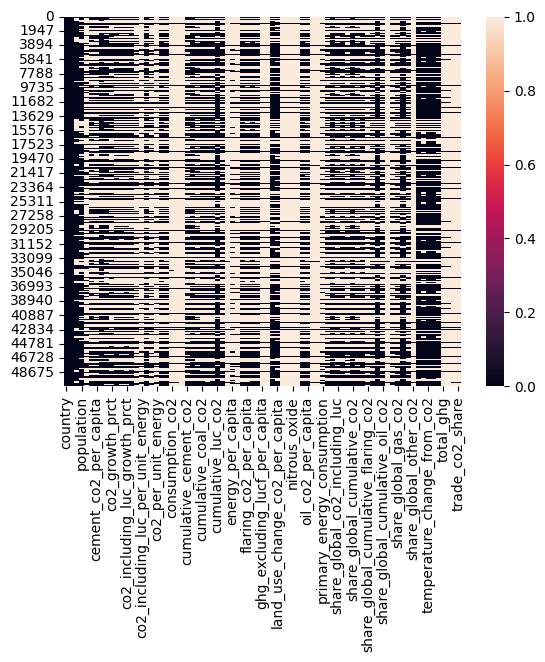

In [4]:
sns.heatmap(carbon.isnull())

There are many null data points in the above dataset , so we must clean the data properly and get useful data, however we will do any dropping at the end, because we will be using multiple other measures first

In [5]:
set(carbon.year)

{1750,
 1751,
 1752,
 1753,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1772,
 1773,
 1774,
 1775,
 1776,
 1777,
 1778,
 1779,
 1780,
 1781,
 1782,
 1783,
 1784,
 1785,
 1786,
 1787,
 1788,
 1789,
 1790,
 1791,
 1792,
 1793,
 1794,
 1795,
 1796,
 1797,
 1798,
 1799,
 1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,

#### Our dataset contains data from 1750 - 2021

However we dont need all this data, so, we are going to categorize data into the most latest and most oldest to check for changes happenned in between

In [6]:
#Keeping only the rows with the latest possible data for a specific country
carbonNew=carbon.groupby('country',as_index=False).apply(lambda cnt:cnt[cnt['year']==cnt['year'].max()])

# Keeping only the rows with the oldest possible data for a speicific country
carbonOld=carbon.groupby('country',as_index=False).apply(lambda cnt:cnt[cnt['year']==cnt['year'].min() ])

carbonNew.head()

,,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,171,Afghanistan,2021,AFG,4.009946e+07,NaN,0.012,0.000,11.874,0.192,1.647,...,NaN,0.083,0.001,0.001,0.001,0.000,NaN,NaN,NaN,NaN
1,443,Africa,2021,NaN,1.393677e+09,NaN,77.735,0.056,1450.796,64.907,4.683,...,NaN,9.186,0.060,0.077,0.148,0.011,NaN,NaN,NaN,NaN
2,615,Africa (GCP),2021,NaN,NaN,NaN,NaN,NaN,1450.783,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,787,Aland Islands,2021,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,959,Albania,2021,ALB,2.854710e+06,NaN,1.048,0.367,4.619,-0.109,-2.315,...,NaN,0.024,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN


How ever this can be the case that, there were some countries during a particular time period which no longer exist, in such case this code will still take the most recent year and the most oldest year of that particular country.
to fix that we need to manually check the years present here and drop the rows which are too old or are possibly Null

In [7]:
# Checking for old years
set(carbonNew.year)

{1956, 1957, 1958, 1972, 1979, 1980, 1991, 2021}

So, there does exist such rows, and we need to remove those rows

### Cleaning Data

In [8]:
carbonNew=carbonNew.reset_index(drop=True)
carbonOld=carbonOld.reset_index(drop=True)

<Axes: >

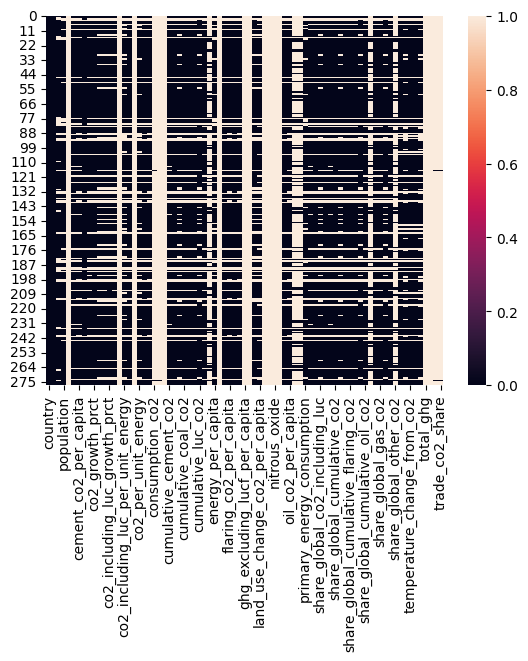

In [9]:
sns.heatmap(carbonNew.isnull())

As its visible, many columns are completely blank, while there are some values which are null, and can be filled up by mean or other method

<Axes: >

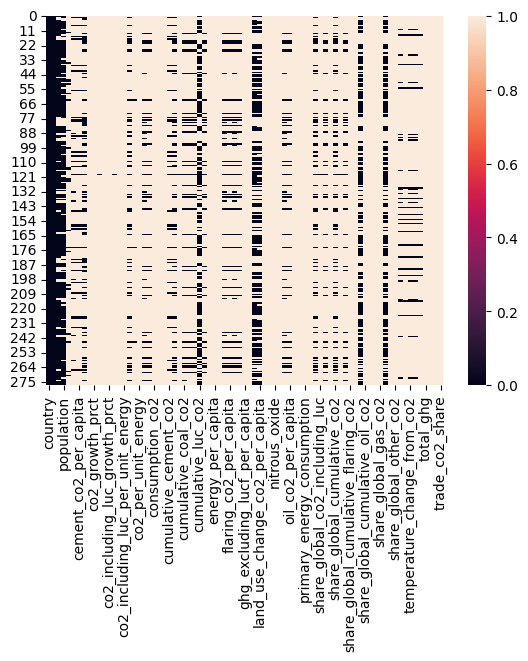

In [10]:
sns.heatmap(carbonOld.isnull())

Its easily visible here, that as expected old data has most of the missing points, but we would be cleaning up data data, to keep only quality data.

In [11]:
carbonNew.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,2021,AFG,4.009946e+07,NaN,0.012,0.000,11.874,0.192,1.647,...,NaN,0.083,0.001,0.001,0.001,0.000,NaN,NaN,NaN,NaN
1,Africa,2021,NaN,1.393677e+09,NaN,77.735,0.056,1450.796,64.907,4.683,...,NaN,9.186,0.060,0.077,0.148,0.011,NaN,NaN,NaN,NaN
2,Africa (GCP),2021,NaN,NaN,NaN,NaN,NaN,1450.783,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aland Islands,2021,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,2021,ALB,2.854710e+06,NaN,1.048,0.367,4.619,-0.109,-2.315,...,NaN,0.024,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN


We would probably not need all the data, so we will exclude some columns

In [12]:
carbonOld.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [13]:
#Excluding some columns
# carbonNew=carbonNew.drop(columns=['co2_per_unit_energy','ghg_excluding_lucf_per_capita','share_global_co2_including_luc','share_global_cumulative_flaring_co2','share_global_cumulative_oil_co2','share_global_gas_co2','share_global_other_co2','consumption_co2','nitrous_oxide','methane','trade_co2','consumption_co2_per_gdp','land_use_change_co2_per_capita','trade_co2_share','total_ghg'])
carbonNew=carbonNew[['country','population','year','co2_per_capita','co2','coal_co2','energy_per_capita','temperature_change_from_co2']]
# Picking only few columns from old section
carbonOld=carbonOld[['country','year','population','co2_per_capita','co2']]

In [14]:
carbonNew.shape

(278, 8)

<Axes: >

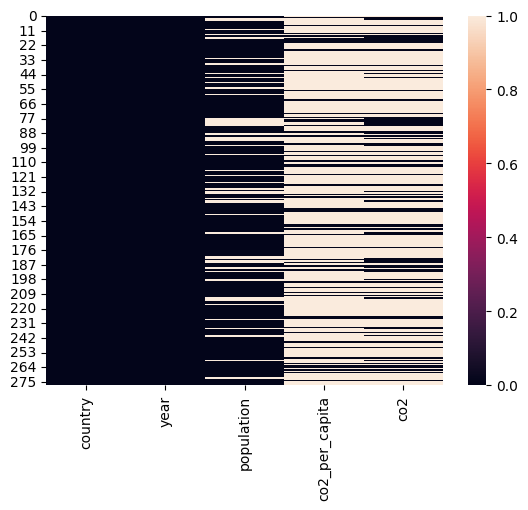

In [15]:
sns.heatmap(carbonOld.isnull())

In [16]:
carbonOld=carbonOld.dropna(subset=['co2','population','co2_per_capita'])

We should have a completely clean dataset by now:)

Now lets clean carbonNew dataset


<Axes: >

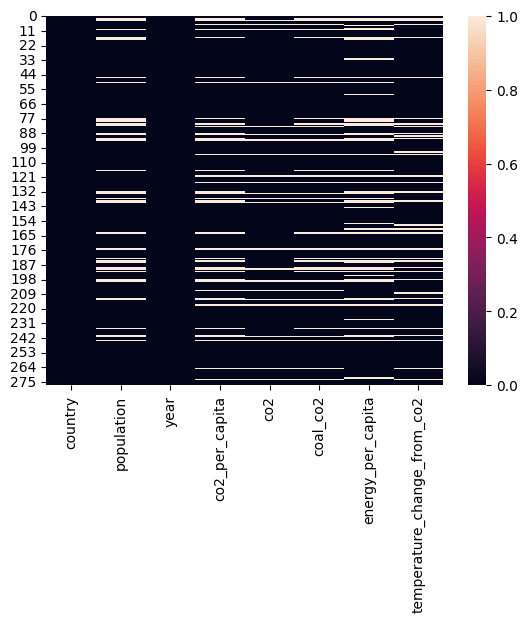

In [17]:
sns.heatmap(carbonNew.isnull())

#### Assuming all null points to be NULL

In [18]:
carbonNew['co2']=carbonNew['co2'].fillna(carbonNew.co2.mean())
carbonNew['population']=carbonNew['population'].fillna(carbonNew.co2.mean())
carbonNew['co2_per_capita']=carbonNew['co2_per_capita'].fillna(carbonNew.co2.mean())
carbonNew['coal_co2']=carbonNew['coal_co2'].fillna(carbonNew.co2.mean())
carbonNew['energy_per_capita']=carbonNew['energy_per_capita'].fillna(carbonNew.co2.mean())
carbonNew['temperature_change_from_co2']=carbonNew['temperature_change_from_co2'].fillna(carbonNew.co2.mean())

<Axes: >

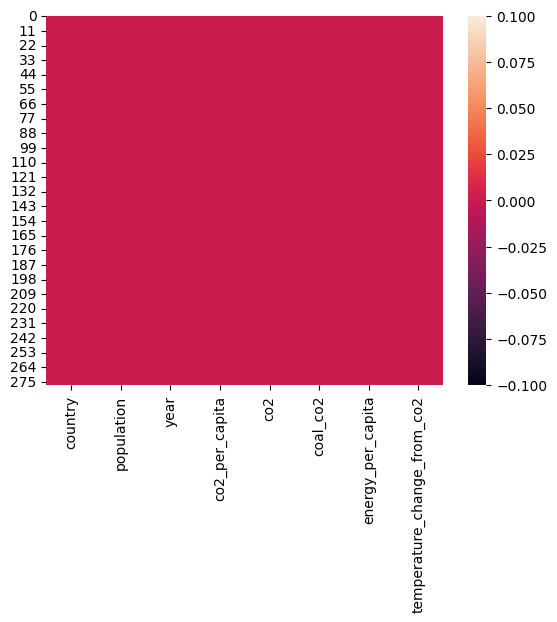

In [19]:
sns.heatmap(carbonNew.isnull())

now as there are no null values we can work with more data preprocessing:)

### Converting all countries to lowercase for better interpretation

In [20]:
carbonNew['country']=carbonNew['country'].str.lower()

In [21]:
carbonNew.head()

,country,population,year,co2_per_capita,co2,coal_co2,energy_per_capita,temperature_change_from_co2
0,afghanistan,4.009946e+07,2021,0.296000,11.874000,4.204000,676.696000,0.001000
1,africa,1.393677e+09,2021,1.041000,1450.796000,433.855000,4027.117000,0.077000
2,africa (gcp),9.458013e+02,2021,945.801286,1450.783000,945.801286,945.801286,945.801286
3,aland islands,9.458013e+02,2021,945.801286,945.801286,945.801286,945.801286,945.801286
4,albania,2.854710e+06,2021,1.618000,4.619000,0.174000,14100.432000,0.000000


### Exporting New data to a csv file for better access

In [45]:
carbonNew.to_csv("co2_data.csv")

### Merging all csvs

In [22]:
c1=pandas.read_csv("allData/PowerSource.csv")
c2=pandas.read_csv("allData/PricesElectricity.csv")
c3=pandas.read_csv("allData/required_data.csv")

# Converting all countries to lowercase for better access
def lowerCase(x):
    return x.lower()

c1['country']=c1['country'].apply(lowerCase)
c2['country']=c2['country'].apply(lowerCase)
c3['country']=c3['country'].apply(lowerCase)

In [23]:
c1.head()

,Unnamed: 0,country,major_power_source
0,0,afghanistan,Hydropower \n
1,1,albania,Hydropower \n
2,2,algeria,Gas\n
3,3,american samoa,Oil\n
4,4,angola,Hydropower \n


In [24]:
c2.head()

,Unnamed: 0,country,AvgPrice
0,0,libya,$0.007
1,1,angola,$0.013
2,2,sudan,$0.014
3,3,kyrgyzstan,$0.017
4,4,zimbabwe,$0.021


In [25]:
c3.head()

,Unnamed: 0,country,year,population,co2,co2_per_capita,gas_co2_per_capita
0,0,afghanistan,2021,4.009946e+07,1.187400e+07,0.296,0.006
1,1,africa,2021,1.393677e+09,1.450796e+09,1.041,0.234
2,2,albania,2021,2.854710e+06,4.619000e+06,1.618,0.053
3,3,algeria,2021,4.417796e+07,1.762690e+08,3.990,2.100
4,4,andorra,2021,7.905700e+04,4.530000e+05,5.729,0.000


In [26]:
c1=c1.drop("Unnamed: 0",axis=1)
c2=c2.drop("Unnamed: 0",axis=1)
c3=c3.drop("Unnamed: 0",axis=1)

In [27]:
merged=c1.merge(c2, on='country', how='left') \
              .merge(c3, on='country', how='left')

In [28]:
merged.head()

,country,major_power_source,AvgPrice,year,population,co2,co2_per_capita,gas_co2_per_capita
0,afghanistan,Hydropower \n,$0.065,2021.0,40099460.0,11874000.0,0.296,0.006
1,albania,Hydropower \n,$0.116,2021.0,2854710.0,4619000.0,1.618,0.053
2,algeria,Gas\n,$0.033,2021.0,44177964.0,176269000.0,3.990,2.100
3,american samoa,Oil\n,$0.265,NaN,NaN,NaN,NaN,NaN
4,angola,Hydropower \n,$0.013,2021.0,34503776.0,21363000.0,0.619,0.086


Now, we need to preprocess the last to things, we need to remove the newline characters and $ signs to do better manipulations with data.

In [29]:
def remNewLine(x):
    return x.replace("\n","")

merged['major_power_source']=merged['major_power_source'].apply(remNewLine)

In [30]:
def remDollar(x):
    a=str(x).replace("$","")
    return float(a)
merged['AvgPrice']=merged['AvgPrice'].apply(remDollar)

In [31]:
merged.head()

,country,major_power_source,AvgPrice,year,population,co2,co2_per_capita,gas_co2_per_capita
0,afghanistan,Hydropower,0.065,2021.0,40099460.0,11874000.0,0.296,0.006
1,albania,Hydropower,0.116,2021.0,2854710.0,4619000.0,1.618,0.053
2,algeria,Gas,0.033,2021.0,44177964.0,176269000.0,3.990,2.100
3,american samoa,Oil,0.265,NaN,NaN,NaN,NaN,NaN
4,angola,Hydropower,0.013,2021.0,34503776.0,21363000.0,0.619,0.086


<Axes: >

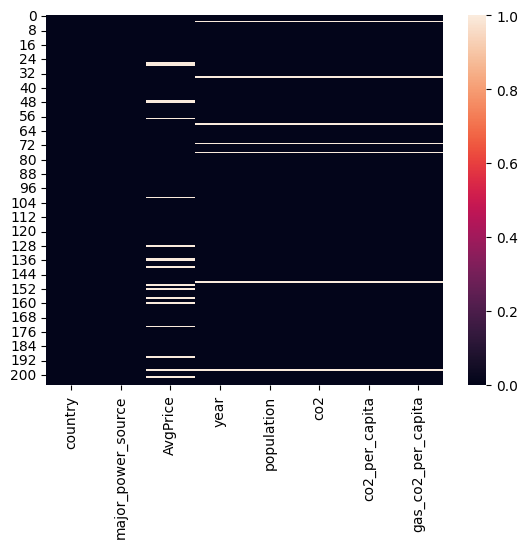

In [32]:
sns.heatmap(merged.isnull())

In [33]:
merged['AvgPrice']=merged['AvgPrice'].fillna(merged['AvgPrice'].mean())

In [34]:
merged['AvgPrice'].mean()

0.1602446808510639

In [35]:
merged=merged.dropna()

In [36]:
newRow = {'country': ['Avg'], 'major_power_source': ['Oil'], 'AvgPrice': [merged['AvgPrice'].mean()],'year':[2021],'population':[merged['population'].mean()],'co2':[merged['co2'].mean()],'co2_per_capita':[merged['co2_per_capita'].mean()],'gas_co2_per_capita':[merged['gas_co2_per_capita'].mean()]}

In [37]:
newRow=pandas.DataFrame(newRow)

In [38]:
merged= pandas.concat([merged, newRow])

Now we have also added a new row to the data with all the average values, in case the carbon calculator can't find the country name we would be using the global average

In [39]:
merged.tail()

,country,major_power_source,AvgPrice,year,population,co2,co2_per_capita,gas_co2_per_capita
202,vietnam,Coal,0.081000,2021.0,9.746802e+07,3.260140e+08,3.345000,0.14000
203,yemen,Oil,0.036000,2021.0,3.298164e+07,1.247700e+07,0.378000,0.00600
204,zambia,Hydropower,0.056000,2021.0,1.947313e+07,7.676000e+06,0.394000,0.00000
205,zimbabwe,Hydropower,0.021000,2021.0,1.599352e+07,1.129600e+07,0.706000,0.00000
0,Avg,Oil,0.159443,2021.0,3.928114e+07,1.811043e+08,4.619151,1.39406


In [40]:
merged.to_csv("importantData.csv")

In [47]:
merged['major_power_source'].mode()

0    Oil
Name: major_power_source, dtype: object

In [48]:
merged['AvgPrice'].mean()

0.15944301293702556

In [49]:
merged['co2_per_capita'].mean()

4.619150753768845

In [50]:
merged['gas_co2_per_capita'].mean()

1.3940603015075377

## Thank you for viewing this notebook

Hope you like it, if you do please star this repository:)